# Task 2: Comparing the Gesture Recognizers

In [2]:

from matplotlib import pyplot as plt
import numpy as np
import os
import random
import time
import xml.etree.ElementTree as ET

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from tqdm.notebook import tqdm
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from scipy.signal import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

NUM_POINTS = 50

In [3]:
# from lesseons lstm_demo notebool and changed a bit
def load_data(folder, subfolder):
    data = []

    for root, subdirs, files in os.walk(folder):
        if 'ipynb_checkpoint' in root:
            continue

        if len(files) > 0:
            for f in tqdm(files):
                if '.xml' in f:
                    fname = f.split('.')[0]
                    label = fname[:-2]

                    xml_root = ET.parse(f'{subfolder}{root}/{f}').getroot()

                    points = []
                    for element in xml_root.findall('Point'):
                        x = element.get('X')
                        y = element.get('Y')
                        points.append([x, y])

                    points = np.array(points, dtype=float)

                    scaler = StandardScaler()
                    points = scaler.fit_transform(points)

                    resampled = resample(points, NUM_POINTS)

                    data.append((label, resampled))
    return data

In [4]:
data_test = load_data('dataset', '')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

In [5]:
print(data_test[0])

('delete_mark', array([[-0.59194871, -2.0564185 ],
       [-1.10749981, -1.72358499],
       [-0.73167789, -1.57949298],
       [-0.78982185, -1.33604894],
       [-0.63813219, -1.19769015],
       [-0.61820291, -0.97538177],
       [-0.44748775, -0.81930244],
       [-0.33869274, -0.63089084],
       [-0.18408279, -0.44177709],
       [-0.04503403, -0.26699279],
       [ 0.13402561, -0.11031941],
       [ 0.31877319,  0.0414887 ],
       [ 0.51111755,  0.15913344],
       [ 0.69051573,  0.26020367],
       [ 0.8638507 ,  0.36411051],
       [ 1.04083879,  0.43493292],
       [ 1.23708325,  0.61934448],
       [ 1.41892455,  0.73421804],
       [ 1.59796671,  0.81434867],
       [ 1.83782307,  0.90144771],
       [ 1.82299607,  0.96430651],
       [ 1.58686263,  0.99273416],
       [ 1.40841071,  0.99361867],
       [ 1.19702547,  1.0171165 ],
       [ 0.99961903,  1.02758324],
       [ 0.77968464,  1.03353725],
       [ 0.43026292,  1.07362357],
       [ 0.06962748,  1.12189154],
    

### Checking how the data looks

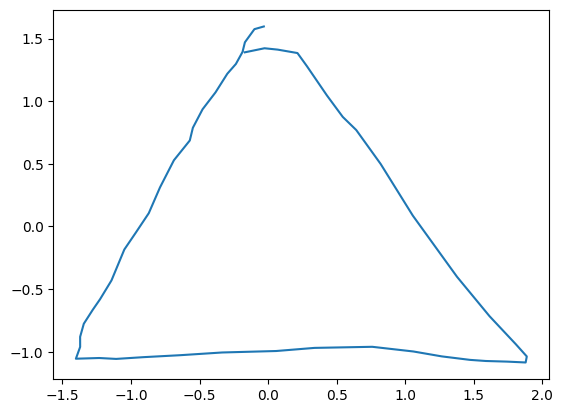

In [6]:
test_data = random.sample(data_test, 1)[0]

label = test_data[0]
sequence = test_data[1]
sequence

plt.plot(sequence.T[0], sequence.T[1]*-1)

# Prepare Data

In [7]:
def prepare_data(data):
    labels = [sample[0] for sample in data]

    print(set(labels))

    encoder = LabelEncoder()
    labels_encoded = encoder.fit_transform(labels)

    print(set(labels_encoded))

    y = to_categorical(labels_encoded)

    print(len(y[0]))

    sequences = [sample[1] for sample in data]
    X = np.array(sequences)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test, labels

In [8]:
X_train, X_test, y_train, y_test, labels = prepare_data(data_test)

{'caret', 'v', 'triangle', 'right_curly_bracket', 'arrow', 'left_curly_bracket', 'rectangle', 'left_sq_bracket', 'x', 'check', 'star', 'left_curly_brace', 'right_sq_bracket', 'delete_mark', 'circle', 'question_mark', 'pigtail', 'right_curly_brace'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
18
(4351, 50, 2) (1088, 50, 2) (4351, 18) (1088, 18)


# Build the model

In [9]:
def build_model(lstm_units):
    model = Sequential()

    # add LSTM layer
    # input shape is (length of an individual sample, dimensions of the sample)
    # in our case: two dimensions, as we have X and Y coordinates
    model.add(LSTM(lstm_units, input_shape=(NUM_POINTS, 2)))

    # add dense layer to do machine learning magic
    model.add(Dense(32, activation='relu'))

    # here, you can add more layers and maybe a dropout for better performance

    # softmax layer for classification
    model.add(Dense(len(set(labels)), activation='softmax'))


    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [10]:
def fit_model(model):
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
    stop_early = EarlyStopping(monitor='val_loss', patience=3)
    start = time.time()
    history = model.fit(
        X_train,
        y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1,
        callbacks=[reduce_lr, stop_early],
    )
    duartion = time.time() - start
    return history, duartion

In [11]:
y_test.shape, y_train.shape

((1088, 18), (4351, 18))

# Define Visualisation Methods

In [12]:
def visualize_results(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    fig = plt.figure(figsize=(15, 7))
    ax = plt.gca()

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy (Line), Loss (Dashes)')

    ax.axhline(1, color='gray')

    plt.plot(accuracy, color='blue', label='Training Accuracy')
    plt.plot(val_accuracy, color='orange', label='Validation Accuracy')
    plt.plot(loss, '--', color='blue', alpha=0.5, label='Training Loss')
    plt.plot(val_loss, '--', color='orange', alpha=0.5, label='Validation Loss')

    plt.legend()
    plt.show()

## Compare with different numbers of units in LSTM Layer

-> reduce the paramter count

### Units:

Chossen the same steps as with image resolution for a solid variation:

- 16
- 32
- 64
- 128

Finally a comparison to the 1$ gesture recognizer.

In [13]:
UNITS_LSTM_LIST = [128, 64, 32, 16]



 ---- Condition 128 -------- 

 
Epoch 1/20


/Users/luca/Projekte/Master/ITT/W7/assignment-6-gesture-recognition-LucaEscher/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4546 - loss: 1.8609 - val_accuracy: 0.8750 - val_loss: 0.4438 - learning_rate: 0.0010
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9206 - loss: 0.3183 - val_accuracy: 0.9513 - val_loss: 0.2125 - learning_rate: 0.0010
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9486 - loss: 0.1971 - val_accuracy: 0.9467 - val_loss: 0.1808 - learning_rate: 0.0010
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9557 - loss: 0.1497 - val_accuracy: 0.9614 - val_loss: 0.1340 - learning_rate: 0.0010
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9672 - loss: 0.1118 - val_accuracy: 0.9504 - val_loss: 0.1681 - learning_rate: 0.0010
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9634 - loss: 0.1252 - val_accuracy: 0.9688 - val_loss: 0.1072 - learning_rate: 0.0010
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9701 - loss: 0.0860 - val_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,384 (841.35 KB)

 Trainable params: 71,794 (280.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 143,590 (560.90 KB)

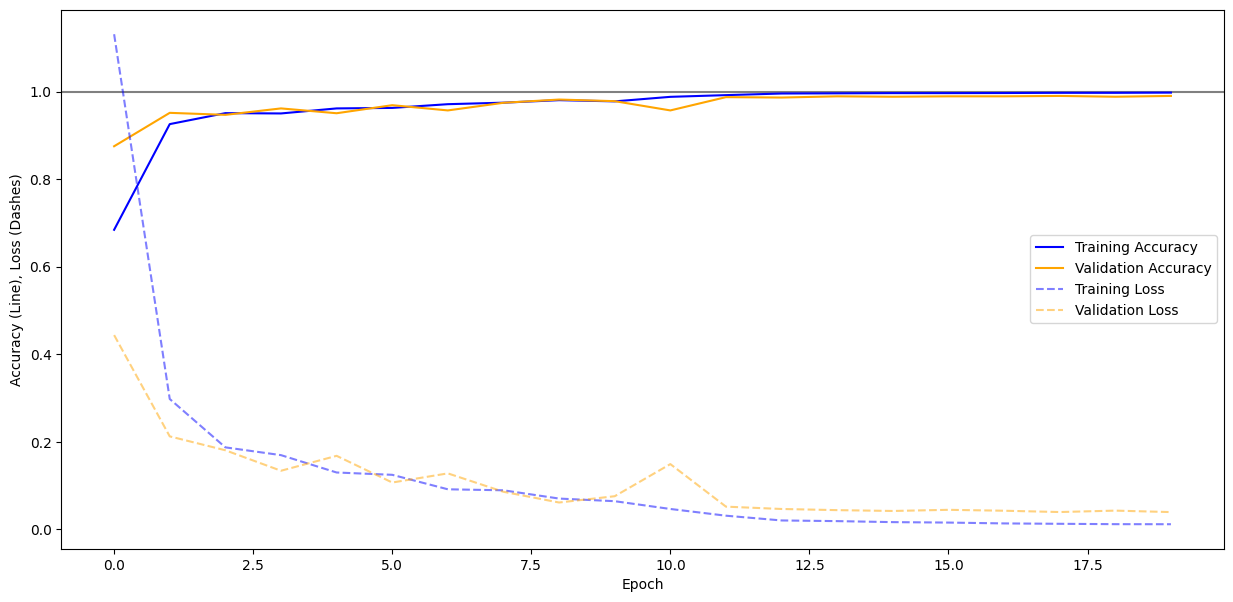



 ---- Condition 64 -------- 

 
Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3824 - loss: 2.2416 - val_accuracy: 0.8833 - val_loss: 0.5210 - learning_rate: 0.0010
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9180 - loss: 0.3838 - val_accuracy: 0.9439 - val_loss: 0.2536 - learning_rate: 0.0010
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9490 - loss: 0.2138 - val_accuracy: 0.9596 - val_loss: 0.1838 - learning_rate: 0.0010
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9693 - loss: 0.1346 - val_accuracy: 0.9476 - val_loss: 0.1820 - learning_rate: 0.0010
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9671 - loss: 0.1280 - val_accuracy: 0.9614 - val_loss: 0.1595 - learning_rate: 0.0010
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9758 - loss: 0.0923 - val_accuracy: 0.9678 - val_loss: 0.1193 - learning_rate: 0.0010
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,480 (232.35 KB)

 Trainable params: 19,826 (77.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,654 (154.90 KB)

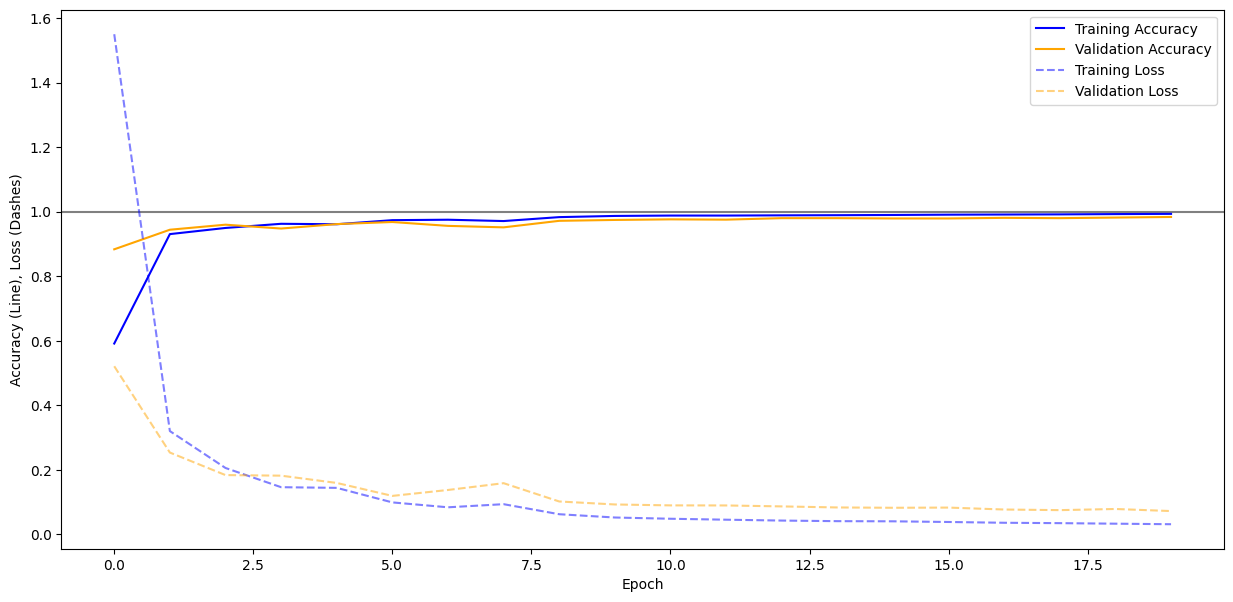



 ---- Condition 32 -------- 

 
Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2985 - loss: 2.4568 - val_accuracy: 0.7840 - val_loss: 0.9896 - learning_rate: 0.0010
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8467 - loss: 0.7556 - val_accuracy: 0.9292 - val_loss: 0.4368 - learning_rate: 0.0010
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9446 - loss: 0.3399 - val_accuracy: 0.9246 - val_loss: 0.3566 - learning_rate: 0.0010
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9486 - loss: 0.2694 - val_accuracy: 0.9504 - val_loss: 0.2398 - learning_rate: 0.0010
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9563 - loss: 0.2046 - val_accuracy: 0.9568 - val_loss: 0.2055 - learning_rate: 0.0010
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9664 - loss: 0.1612 - val_accuracy: 0.9642 - val_loss: 0.1613 - learning_rate: 0.0010
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,392 (71.85 KB)

 Trainable params: 6,130 (23.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,262 (47.90 KB)

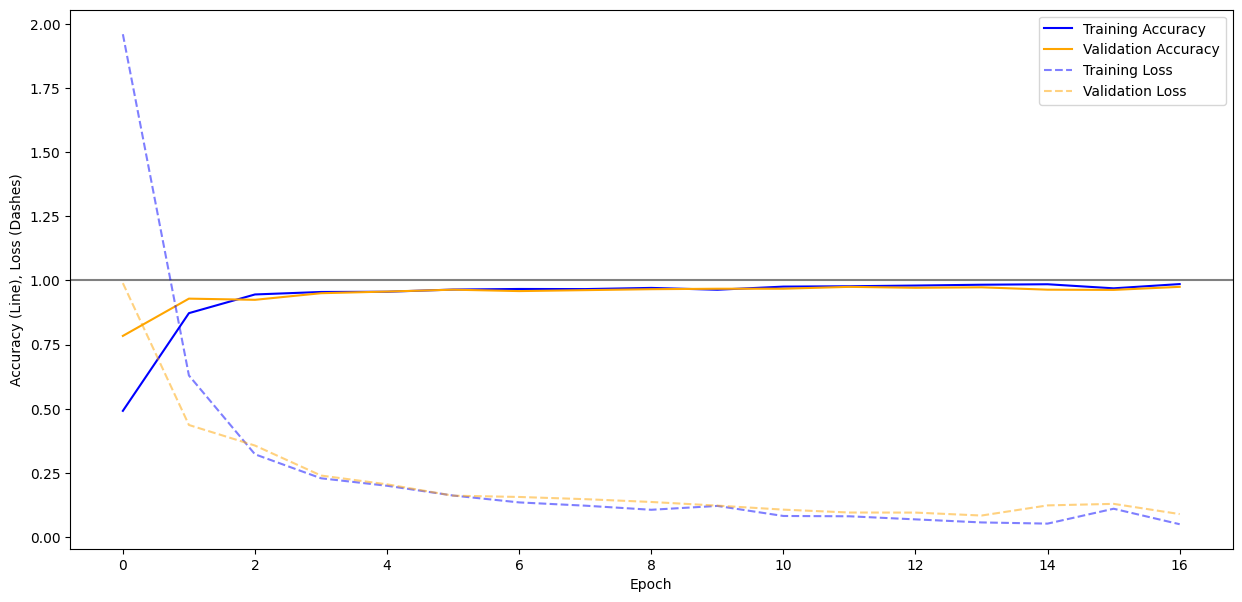



 ---- Condition 16 -------- 

 
Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1660 - loss: 2.6793 - val_accuracy: 0.4936 - val_loss: 1.8101 - learning_rate: 0.0010
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5827 - loss: 1.4741 - val_accuracy: 0.7840 - val_loss: 0.8686 - learning_rate: 0.0010
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8068 - loss: 0.7391 - val_accuracy: 0.8208 - val_loss: 0.6287 - learning_rate: 0.0010
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8505 - loss: 0.5633 - val_accuracy: 0.8805 - val_loss: 0.4905 - learning_rate: 0.0010
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8973 - loss: 0.4217 - val_accuracy: 0.8998 - val_loss: 0.4017 - learning_rate: 0.0010
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9168 - loss: 0.3461 - val_accuracy: 0.9256 - val_loss: 0.3365 - learning_rate: 0.0010
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 16)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,064 (27.60 KB)

 Trainable params: 2,354 (9.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,710 (18.40 KB)

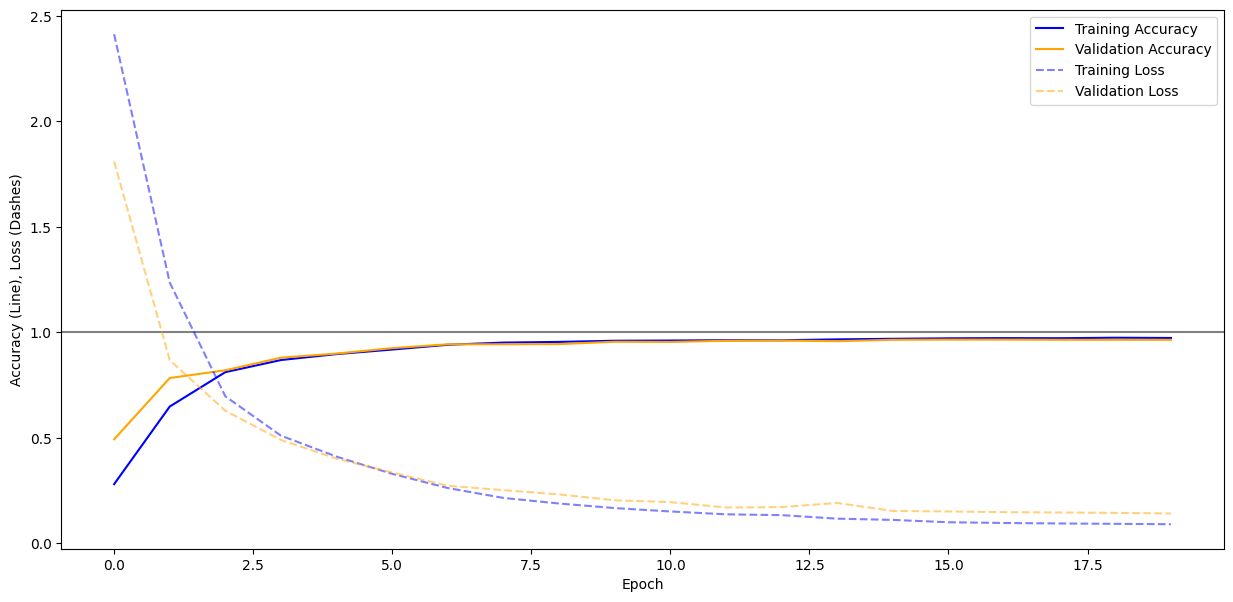

In [14]:
models = []
histories = []
train_durations = []
accuracies = []

for UNITS_LSTM in UNITS_LSTM_LIST:
    print(f'\n\n ---- Condition {UNITS_LSTM} -------- \n\n ')
    model = build_model(UNITS_LSTM)
    history, train_duration = fit_model(model)
    model.summary()
    visualize_results(history)
    accuracy = history.history['val_accuracy']
    
    models.append(model)
    histories.append(history)
    train_durations.append(train_duration)
    accuracies.append(accuracy)

In [15]:
print(len(models))
print(len(histories))
print(len(train_durations))
print(len(accuracies))

4
4
4
4


In [16]:
def evaluate_models(models):
    prediction_times = []
    for index, model in enumerate(models):
        score = model.evaluate(X_test, y_test, verbose=0)

        start_time = time.time()
        pred = model.predict(X_test, verbose = 0)
        stop_time = time.time()
        prediction_time = stop_time - start_time
        prediction_times.append(prediction_time)
        
        print(f'LSTM with {UNITS_LSTM_LIST[index]} parameters:')
        print('Prediction Time: ', prediction_time)
        print('Accuracy: ', score[1], '\n')
    
    return prediction_times

In [17]:
prediction_times = evaluate_models(models)

LSTM with 128 parameters:
Prediction Time:  0.29597997665405273
Accuracy:  0.9898896813392639 

LSTM with 64 parameters:
Prediction Time:  0.16079020500183105
Accuracy:  0.9834558963775635 

LSTM with 32 parameters:
Prediction Time:  0.1415119171142578
Accuracy:  0.9751838445663452 

LSTM with 16 parameters:
Prediction Time:  0.19093108177185059
Accuracy:  0.9650735259056091 



# 1$ Recognizer predictions

In [18]:
from dollar_recognizer.recognizer import Recognizer

recognizer = Recognizer(set(labels))
recognizer.initialize()

16 files were loaded > success!


In [19]:
start_predict_dollar = time.time()
y_predictions = []
for i, points in enumerate(X_test):
    gesture, score = recognizer.recognize(points)
    y_predictions.append(gesture)

duration_predict_dollar = time.time() - start_predict_dollar

In [20]:
acc_dollar = sum(1 for predict, test in zip(y_predictions, set(labels)) if predict == test) / len(y_predictions)

# Visualize Data and Compare

In [21]:
def plot_loss_accuracy(histories):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    colors = ["blue", "orange", "green", "red"]
    count = 0
    
    for history in histories:
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        
        color = colors[count]

        axs[0, 0].plot(accuracy, color=color)
        axs[0, 1].plot(val_accuracy, color=color)
        axs[1, 0].plot(loss, '--', color=color, alpha=0.5)
        axs[1, 1].plot(val_loss, '--', color=color, alpha=0.5)
        
        axs[0, 0].set_title("Accuracy")
        axs[0, 1].set_title("Validation Accuracy")
        axs[1, 0].set_title("Loss")
        axs[1, 1].set_title("Validation Loss")
        
        count += 1
    
        red_8 = mpatches.Patch(color='red', label='8')
        green_16 = mpatches.Patch(color='green', label='16')
        orange_32 = mpatches.Patch(color='orange', label='32')
        blue_64 = mpatches.Patch(color='blue', label='64')
        plt.legend(handles=[red_8, green_16, orange_32, blue_64])
    

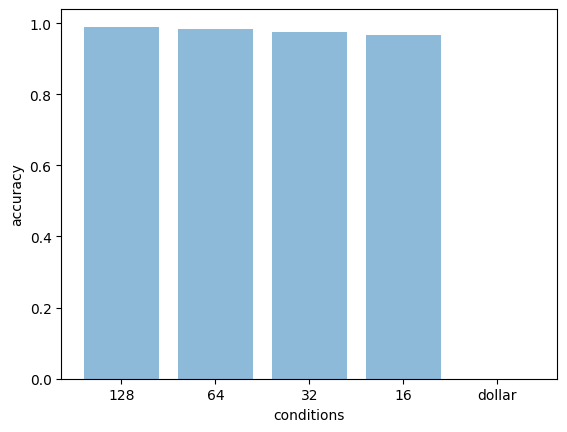

128 --> max accuracy = 0.9898896813392639
64 --> max accuracy = 0.9834558963775635
32 --> max accuracy = 0.9751838445663452
16 --> max accuracy = 0.9659926295280457
dollar --> max accuracy = 0.0


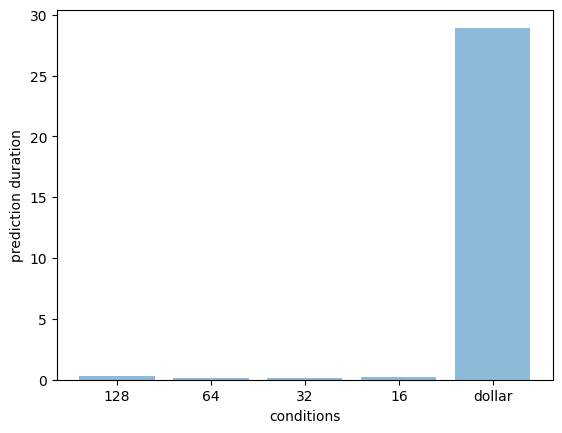

128 --> prediction duration = 0.29597997665405273 seconds
64 --> prediction duration = 0.16079020500183105 seconds
32 --> prediction duration = 0.1415119171142578 seconds
16 --> prediction duration = 0.19093108177185059 seconds
dollar --> prediction duration = 28.939181089401245 seconds


In [22]:
# set up with dollar
conditions = UNITS_LSTM_LIST.copy()
if 'dollar' not in conditions:
    conditions.append('dollar')

y_pos = np.arange(len(conditions))


# accuracies

max_accuracies = []

for acc in accuracies:
    max_accuracies.append(max(acc))

max_accuracies.append(acc_dollar)

plt.bar(y_pos, max_accuracies, align='center', alpha=0.5)
plt.xticks(y_pos, conditions)
plt.ylabel('accuracy')
plt.xlabel('conditions')

plt.show()

for index, max_value in enumerate(max_accuracies):
    print(f'{conditions[index]} --> max accuracy = {max_value}')

    
# prediction time
duration_values = prediction_times.copy()
duration_values.append(duration_predict_dollar)

y_pos = np.arange(len(conditions))

plt.bar(y_pos, duration_values, align='center', alpha=0.5)
plt.xticks(y_pos, conditions)
plt.ylabel('prediction duration')
plt.xlabel('conditions')

plt.show()

for index, duration_value in enumerate(duration_values):
    print(f'{conditions[index]} --> prediction duration = {duration_value} seconds')

# Conclusion comparison with dollar

- accuracy is tottaly off ?? Either the model is very bad or i did sth wrong while measurruing
- either way 1$ performs worse than all other conditions and it taks longer when tring to predict!

-> do not use the one dollar recognizer!

# Comparison without dollar

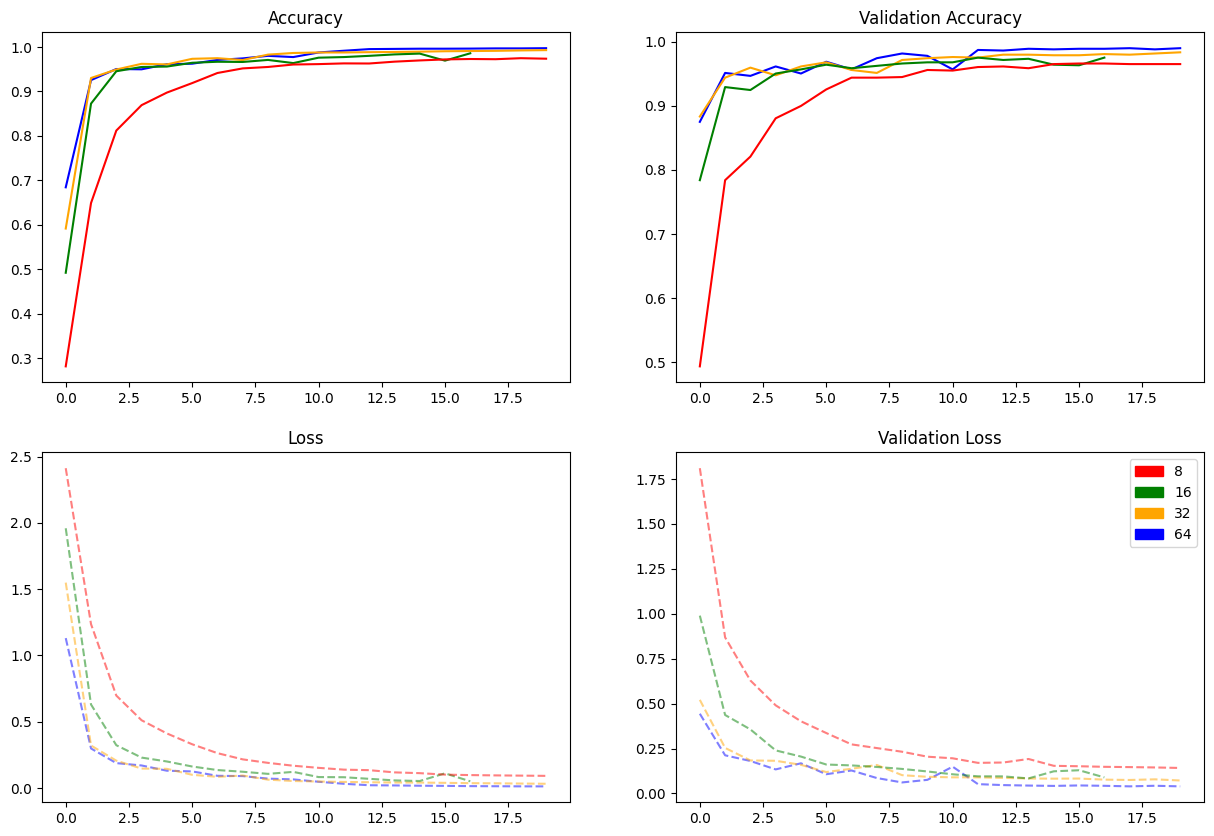

In [23]:
# Legende only appears in last plot ??? > but is the same for every plot
plot_loss_accuracy(histories)

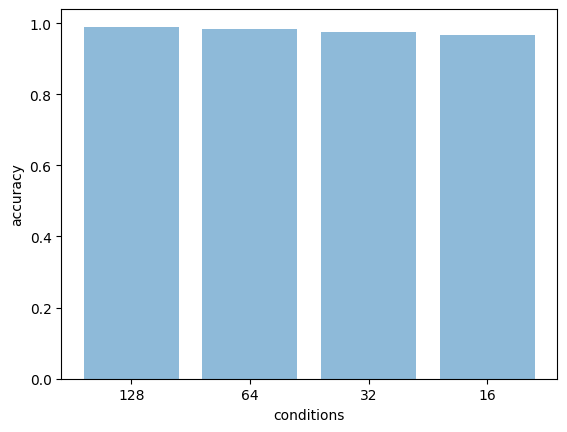

128 --> max accuracy = 0.9898896813392639
64 --> max accuracy = 0.9834558963775635
32 --> max accuracy = 0.9751838445663452
16 --> max accuracy = 0.9659926295280457


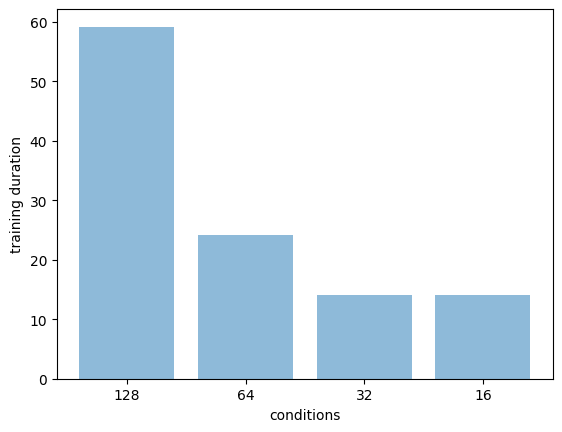

128 --> training duration = 59.19219207763672 seconds
64 --> training duration = 24.214810848236084 seconds
32 --> training duration = 14.098970174789429 seconds
16 --> training duration = 13.998056888580322 seconds


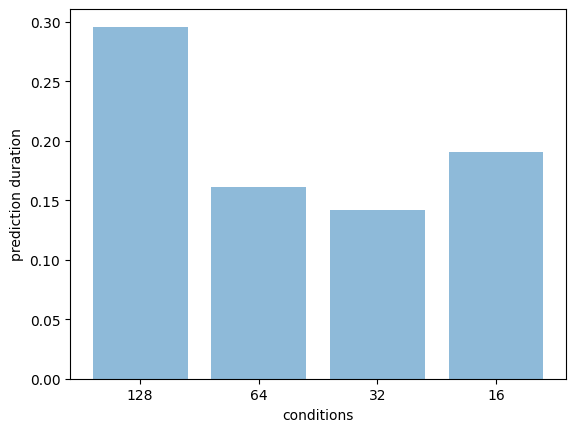

128 --> prediction duration = 0.29597997665405273 seconds
64 --> prediction duration = 0.16079020500183105 seconds
32 --> prediction duration = 0.1415119171142578 seconds
16 --> prediction duration = 0.19093108177185059 seconds


In [26]:
# withoud dollar

conditions = UNITS_LSTM_LIST.copy()
y_pos = np.arange(len(conditions))

# accuracy
 
max_accuracies = []

for acc in accuracies:
    max_accuracies.append(max(acc))


plt.bar(y_pos, max_accuracies, align='center', alpha=0.5)
plt.xticks(y_pos, conditions)
plt.ylabel('accuracy')
plt.xlabel('conditions')

plt.show()

for index, max_value in enumerate(max_accuracies):
    print(f'{conditions[index]} --> max accuracy = {max_value}')

# training time


duration_values = train_durations.copy()

y_pos = np.arange(len(conditions))

plt.bar(y_pos, duration_values, align='center', alpha=0.5)
plt.xticks(y_pos, conditions)
plt.ylabel('training duration')
plt.xlabel('conditions')

plt.show()

# prediction time

for index, duration_value in enumerate(duration_values):
    print(f'{conditions[index]} --> training duration = {duration_value} seconds')
    

duration_values = prediction_times.copy()

y_pos = np.arange(len(conditions))

plt.bar(y_pos, duration_values, align='center', alpha=0.5)
plt.xticks(y_pos, conditions)
plt.ylabel('prediction duration')
plt.xlabel('conditions')

plt.show()

for index, duration_value in enumerate(duration_values):
    print(f'{conditions[index]} --> prediction duration = {duration_value} seconds')

# Comparison 

## Accuracy
All conditions have achieved good and similar values. As was to be expected, 128 layers in the LTSM model have the best accuracy of approx. 0.99. 

## Training Time
128 takes significantly longer than all other conditions. Almost twice as long as 32 layers. All other layers take about the same amount of time. However, it is noticeable that 16 takes longer than 32 and 64. As the accuracy is also worse here, I would therefore not use the model with 16 layers. 64 layers also take noticably longer than 32 layers.

## Prediction TIme
More or less the same result as in training time. but the layers 64 and 32 are closer togehter again.


# Conclusion
All in all, 32 layers seem to be the best choice. Training time and prediction time are the fastest and the accuracy is perfectly adequate (approx. 098 (i.e. almost as good as 128)).

Compared to the 1 dollar recognizer, it should be noted that the data does not have to be preprocessed here. Accordingly, this could also be sufficient. BUT: in my case it achieved such poor values, with 0% accuracy, that it cannot be used. But the error here is probably due to my implementation ???

But since the prediction time with the 1 dollar recognizer was also significantly longer than with the models, it is not a good choice despite the fact that preprocessing is not necessary. 
